In [2]:
# %% [markdown]
# # Jupyter Notebook Loading Header
#
# This is a custom loading header for Jupyter Notebooks in Visual Studio Code.
# It includes common imports and settings to get you started quickly.

# %% [markdown]
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
import os
path = r'C:\Users\DwaipayanChakroborti\AppData\Roaming\gcloud\legacy_credentials\dchakroborti@tonikbank.com\adc.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = path
client = bigquery.Client(project='prj-prod-dataplatform')

# %% [markdown]
## Configure Settings
# Set options or configurations as needed
# Example: pd.set_option('display.max_columns', None)
import sweetviz as sv
from ydata_profiling import ProfileReport

In [3]:
# prj-prod-dataplatform.risk_credit_cic_data.granted_contracts_leasing

sq = """select * from prj-prod-dataplatform.risk_credit_cic_data.granted_contracts_leasing;"""
grantedleasing = client.query(sq).to_dataframe(progress_bar_type='tqdm')

print(f"The rows and columns in  prj-prod-dataplatform.risk_credit_cic_data.granted_contracts_leasing are:/t {grantedleasing.shape}")


Job ID 85499aeb-c736-41c4-ad07-2162ae778748 successfully executed: 100%|██████████|
Downloading: 100%|██████████|
The rows and columns in  prj-prod-dataplatform.risk_credit_cic_data.granted_contracts_leasing are:/t (106655, 15)


In [4]:
grantedleasing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106655 entries, 0 to 106654
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   digitalLoanAccountId  106655 non-null  object
 1   crifApplicationId     106655 non-null  object
 2   customerId            106655 non-null  object
 3   processEngineGuid     106655 non-null  object
 4   requestGuid           106655 non-null  object
 5   CBContractCode        106655 non-null  object
 6   GoodValue             95801 non-null   object
 7   ManufacturingDate     3199 non-null    object
 8   RegistrationNumber    3188 non-null    object
 9   GoodBrand             3242 non-null    object
 10  NewUsedCodeDesc       106655 non-null  object
 11  NewUsedCode           106655 non-null  object
 12  GoodType              98101 non-null   object
 13  GoodTypeDesc          98101 non-null   object
 14  run_date              106655 non-null  dbdate
dtypes: dbdate(1), obj

In [5]:
grantedleasing.describe(include = 'all').T

,count,unique,top,freq
digitalLoanAccountId,106655,56347,b7fcfe8f-46ab-4b8a-a293-2f1eb8e62108,20
crifApplicationId,106655,56368,taran-2636250-6195732,20
customerId,106655,51647,2121678,38
processEngineGuid,106655,45113,9be21cf75100ec9fe03b3f154c42f1fe0bfc7364,13037
requestGuid,106655,56368,32fee7ec-de9b-45ba-b7ce-a1da6e9e714f,20
CBContractCode,106655,95552,201135325,8
GoodValue,95801,14820,20000,1784
ManufacturingDate,3199,16,2021-01-01,959
RegistrationNumber,3188,2818,MHKAB1BA9MJ007108,8
GoodBrand,3242,181,VIOS 1.3 XLE CVT,883


In [6]:
grantedleasingEDA = sv.analyze(grantedleasing)
grantedleasingEDA.show_html("grantedleasingEDA.html")

                                             |          | [  0%]   00:00 -> (? left)

Report grantedleasingEDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [8]:
grantedleasing.sample(10)

,digitalLoanAccountId,crifApplicationId,customerId,processEngineGuid,requestGuid,CBContractCode,GoodValue,ManufacturingDate,RegistrationNumber,GoodBrand,NewUsedCodeDesc,NewUsedCode,GoodType,GoodTypeDesc,run_date
88136,ecf01b7d-97d6-4e61-8b5e-70f847feea4c,tonik-sbcl-231712,1953361,17d8a840-c7bb-11ed-a91e-0242ace60011,17beb7a0-c7bb-11ed-9ce1-0242ace60002,N03333804,658000,2021-01-01,MHKA4DF5FLJ048513,WIGO 1.0 G A/T,New,N,15,Cars,2023-03-21
80383,3b67fb17-8fdc-4f03-8697-8d6a2d05cb41,taran-2671997-5893557,2671997,5978e171c75519aecbc41b64b074bd28bf64b7db,389f01d8-0d6c-4a57-baf7-92e44f7b1678,T01099800,26000,None,None,None,New,N,34,Others (Non-Industrial),2024-07-19
4556,4abac79f-5e93-4df2-9a03-fec47e5b468b,tonik-tul-367260,2265167,bdd2cf40-6c35-11ee-a41d-0242ace60015,bdaa86c0-6c35-11ee-be29-0242ace60008,601065110,12371,None,None,None,New,N,34,Others (Non-Industrial),2023-10-16
90945,8e10f891-406d-4a11-aa7a-88ca821e0f2b,taran-2581043-3110225,2581043,78688bf241a2619a5b43e9caf60995d610ea94fe,ea6a4181-b676-49ff-9d4d-5fc9446a9329,B02710389,7000,None,None,None,New,N,34,Others (Non-Industrial),2024-06-15
84443,abcd1a85-9c32-4f59-b808-894b44c8a13a,tonik-tul-302554,2003872,c4a59c20-2870-11ee-b763-0242ace60006,c48283c0-2870-11ee-9718-0242ace60010,K04073718,15000,None,None,None,New,N,34,Others (Non-Industrial),2023-07-22
104435,47113cf0-1cea-4644-898f-13a12a3dbe42,taran-2633768-1396348,2633768,9be21cf75100ec9fe03b3f154c42f1fe0bfc7364,ccddf63f-d25b-4b49-be94-eaa692819bf4,903421653,16176,None,None,None,New,N,34,Others (Non-Industrial),2024-07-05
93807,7c226f3c-0310-484c-8efc-6249c970264b,taran-2578811-9796107,2578811,78688bf241a2619a5b43e9caf60995d610ea94fe,a02b0e61-d508-4965-ac8a-694ab91dccc1,902439557,7722,None,None,None,New,N,34,Others (Non-Industrial),2024-06-14
5445,830d6d66-ef02-41ff-9212-97da4eaf147f,tonik-tul-491766,2469661,91216670-fd6a-11ee-b07b-0242ace6000f,91030900-fd6a-11ee-989e-0242ace60004,R01043891,23421,None,None,None,New,N,34,Others (Non-Industrial),2024-04-18
40330,042e5d99-203d-4e0f-8ba5-e480bfebd3b0,tonik-sbcl-345699,2237114,19455110-5528-11ee-b07b-0242ace6000f,192741c0-5528-11ee-8875-0242ace60004,001145670,20000,None,None,None,New,N,34,Others (Non-Industrial),2023-09-17
11260,378acee4-74d2-4d03-8d8d-0006a00430fa,tonik-tul-391496,2312744,4ab5eed0-89e4-11ee-a41d-0242ace60015,4a88c450-89e4-11ee-98c3-0242ace60008,003842550,31425,None,None,None,New,N,34,Others (Non-Industrial),2023-11-23


In [9]:
# run_date

# Convert 'LastUpdateDate' to datetime if it's not already
grantedleasing['run_date'] = pd.to_datetime(grantedleasing['run_date'])

# Find the minimum date
min_date = grantedleasing['run_date'].min()

# Find the maximum date
max_date = grantedleasing['run_date'].max()

print(f"run date Minimum date: {min_date.strftime('%Y-%m-%d')}")
print(f"run date Date Maximum date: {max_date.strftime('%Y-%m-%d')}")

run date Minimum date: 2022-10-11
run date Date Maximum date: 2024-07-24


In [11]:
grantedleasing['GoodValue'].fillna('0')
grantedleasing['GoodValue'] = grantedleasing['GoodValue'].astype(np.float64)

C:\Users\DwaipayanChakroborti\AppData\Local\Temp\ipykernel_27020\1550959899.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_counts = sorted_data.groupby('gv')['customerId'].nunique().sort_index()


gv
0%-\n10%      5119
10%-\n20%     4633
20%-\n30%     4740
30%-\n40%     4823
40%-\n50%     5249
50%-\n60%     4403
60%-\n70%     4828
70%-\n80%     4829
80%-\n90%     4829
90%-\n100%    4826
Name: customerId, dtype: int64
0%-10%: $350.00 - $5145.00
10%-20%: $5145.00 - $6691.00
20%-30%: $6691.00 - $8041.00
30%-40%: $8041.00 - $9690.00
40%-50%: $9690.00 - $11330.00
50%-60%: $11330.00 - $13289.80
60%-70%: $13289.80 - $16589.80
70%-80%: $16589.80 - $23341.00
80%-90%: $23341.00 - $40200.00
90%-100%: $40200.00 - $2509000.00


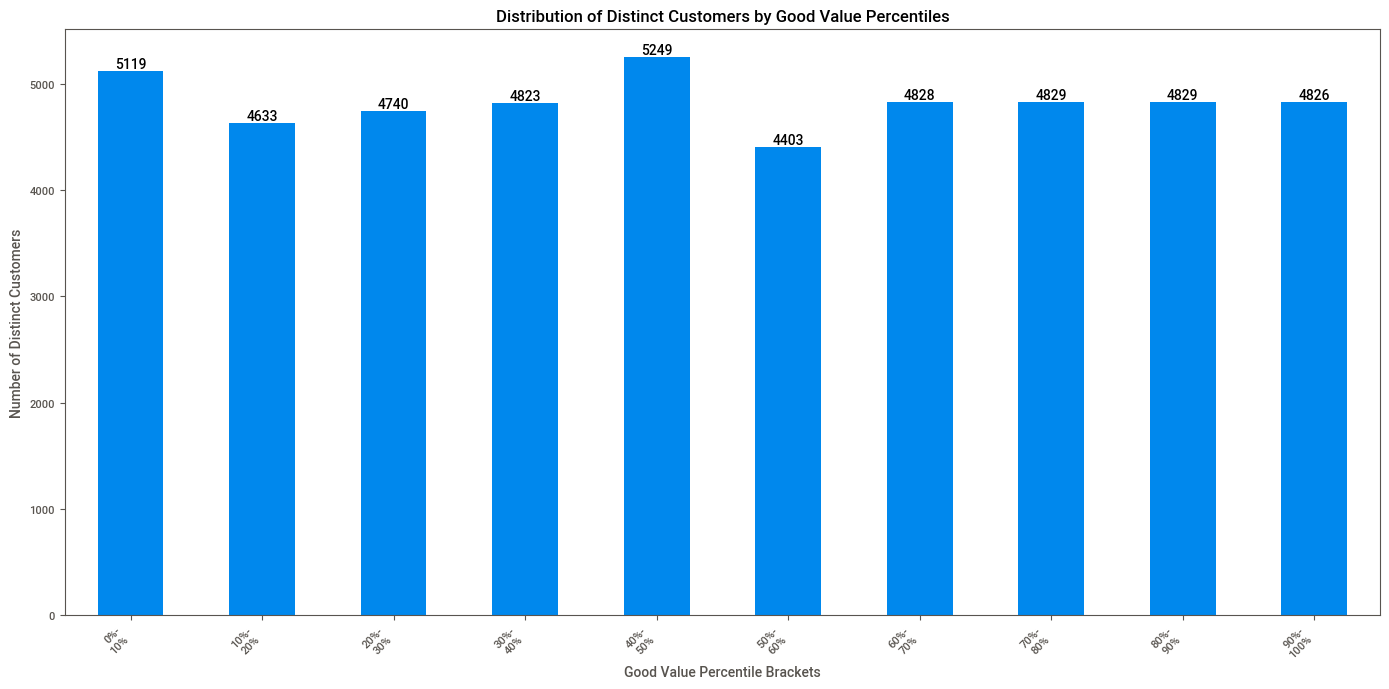

In [12]:
# Remove zeros from GrossIncome and drop duplicates based on CustomerId
sorted_data = grantedleasing[grantedleasing['GoodValue'] > 0].drop_duplicates(subset='customerId')

# Calculate percentiles
num_brackets = 10
percentiles = np.linspace(0, 100, num_brackets + 1)
bins = np.percentile(sorted_data['GoodValue'], percentiles)

# Create labels for the brackets
bracket_labels = [f"{percentiles[i]:.0f}%-\n{percentiles[i+1]:.0f}%" for i in range(num_brackets)]

# Assign income brackets
sorted_data['gv'] = pd.cut(sorted_data['GoodValue'], bins=bins, labels=bracket_labels, include_lowest=True)

# Count distinct customers in each bracket
customer_counts = sorted_data.groupby('gv')['customerId'].nunique().sort_index()

# Create the plot
plt.figure(figsize=(14, 7))  # Increased figure size for better label visibility
ax = customer_counts.plot(kind='bar')
plt.title('Distribution of Distinct Customers by Good Value Percentiles')
plt.xlabel('Good Value Percentile Brackets')
plt.ylabel('Number of Distinct Customers')
plt.xticks(rotation=45, ha='right')

# Add data labels
for i, v in enumerate(customer_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()

# Save the plot as an SVG
plt.savefig('distinct_customers_Good_Value_Distribution_percentiles.svg', format='svg')

# Print the actual counts
print(customer_counts)

# Print the income ranges for each percentile bracket
for i in range(num_brackets):
    print(f"{percentiles[i]:.0f}%-{percentiles[i+1]:.0f}%: ${bins[i]:.2f} - ${bins[i+1]:.2f}")

In [13]:
# ManufacturingDate

# Convert 'LastUpdateDate' to datetime if it's not already
grantedleasing['ManufacturingDate'] = pd.to_datetime(grantedleasing['ManufacturingDate'])

# Find the minimum date
min_date = grantedleasing['ManufacturingDate'].min()

# Find the maximum date
max_date = grantedleasing['ManufacturingDate'].max()

print(f"ManufacturingDate Minimum date: {min_date.strftime('%Y-%m-%d')}")
print(f"ManufacturingDate Maximum date: {max_date.strftime('%Y-%m-%d')}")

ManufacturingDate Minimum date: 2006-01-01
ManufacturingDate Maximum date: 2024-01-01


<Axes: xlabel='GoodBrand'>

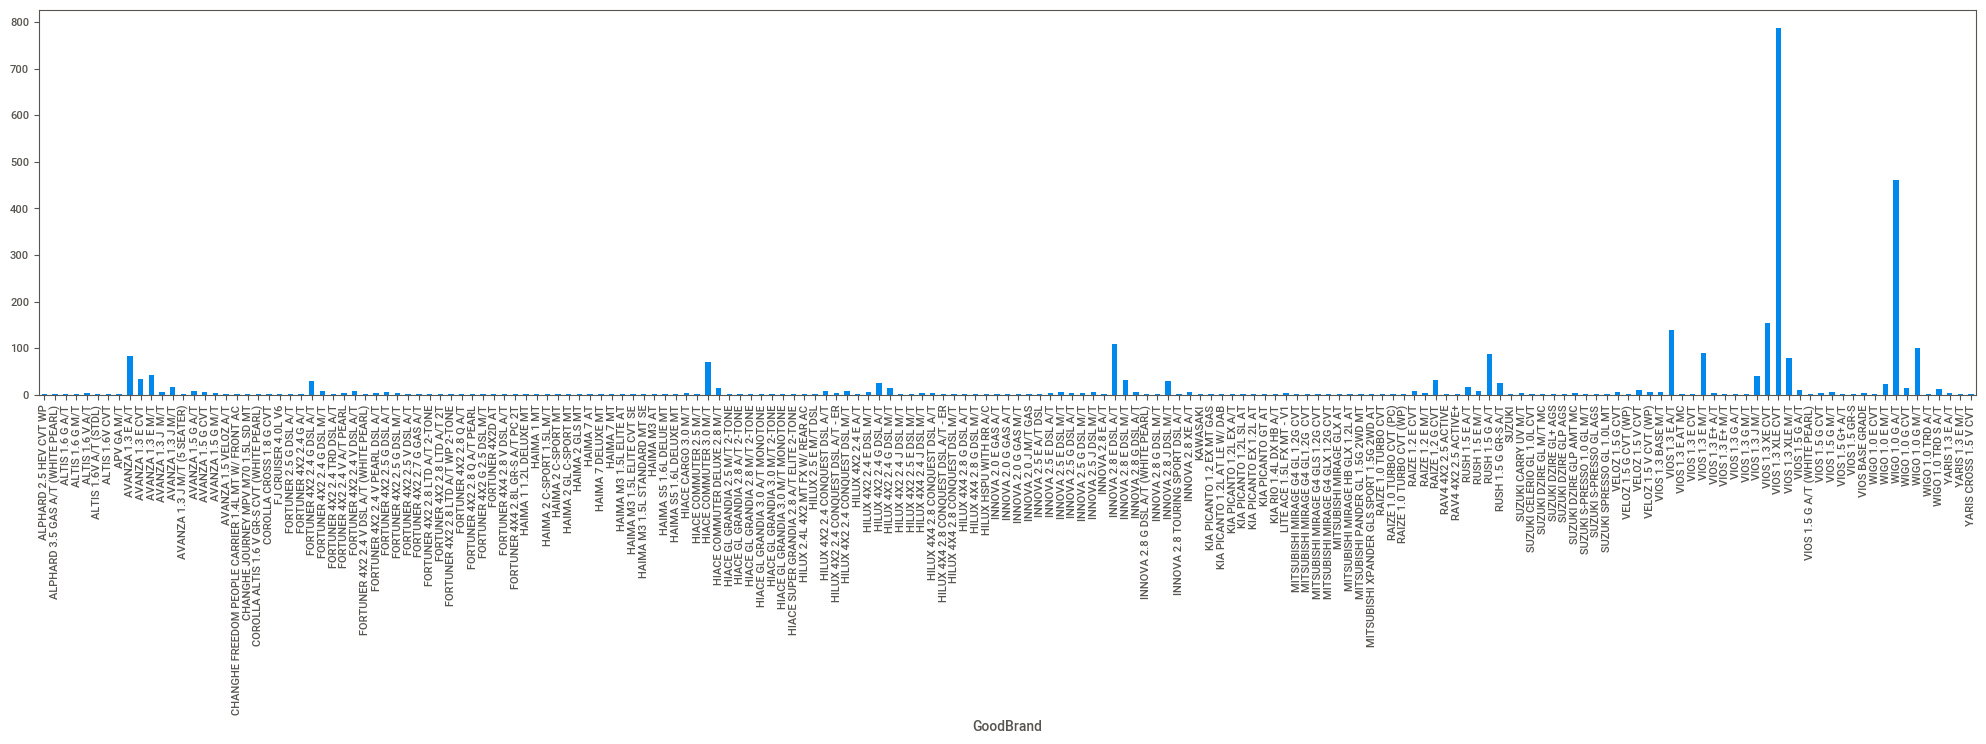

In [17]:
grantedleasing.groupby('GoodBrand')['customerId'].nunique().plot(kind = 'bar', figsize =(25, 5))

<Axes: xlabel='GoodTypeDesc'>

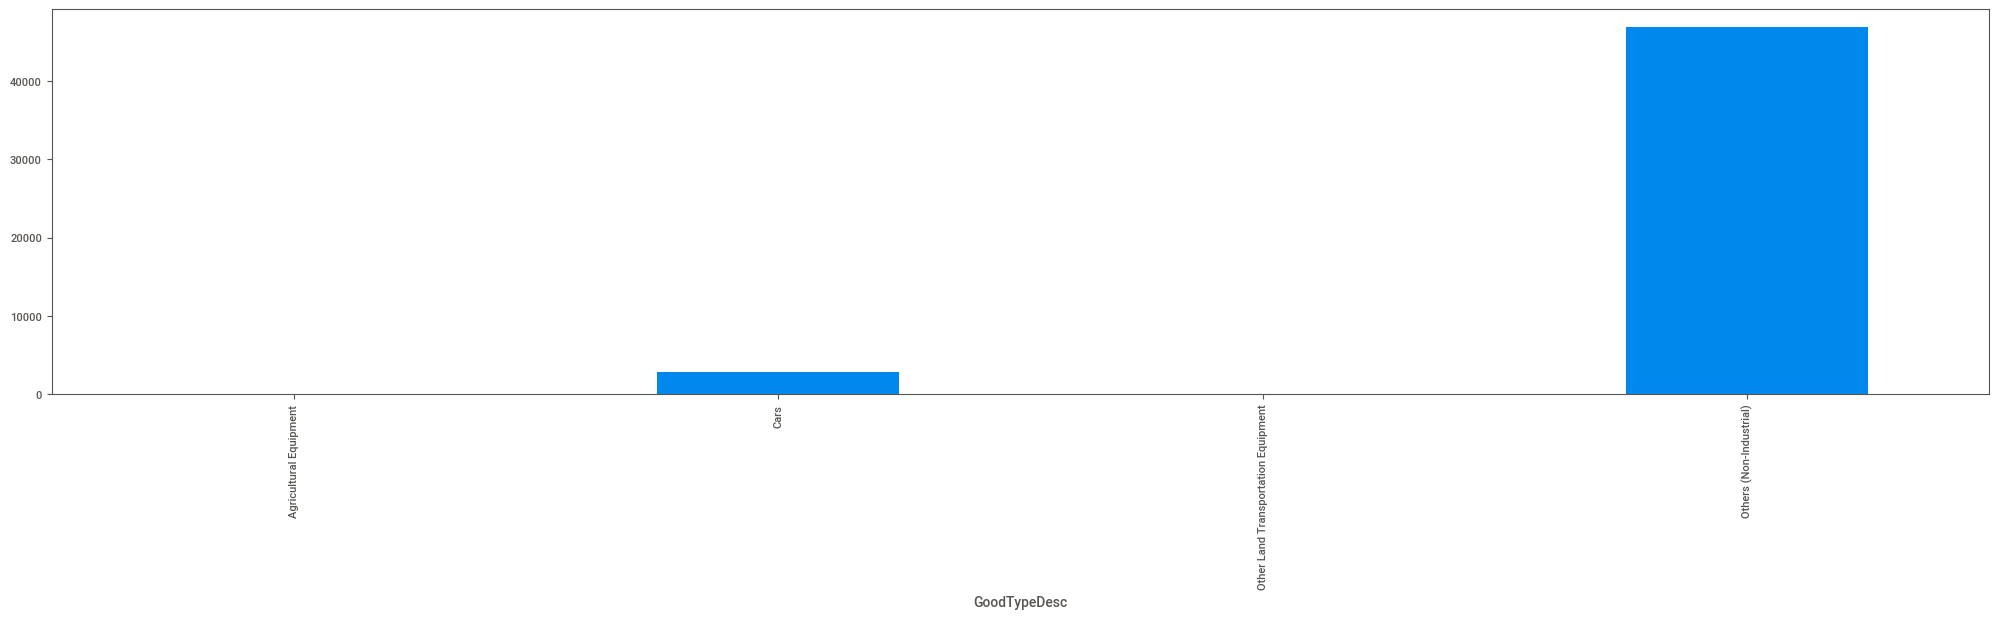

In [18]:
grantedleasing.groupby('GoodTypeDesc')['customerId'].nunique().plot(kind = 'bar', figsize =(25, 5))

In [19]:
grantedleasing.groupby('GoodTypeDesc')['customerId'].nunique()

GoodTypeDesc
Agricultural Equipment                     1
Cars                                    2785
Other Land Transportation Equipment        2
Others (Non-Industrial)                46848
Name: customerId, dtype: int64

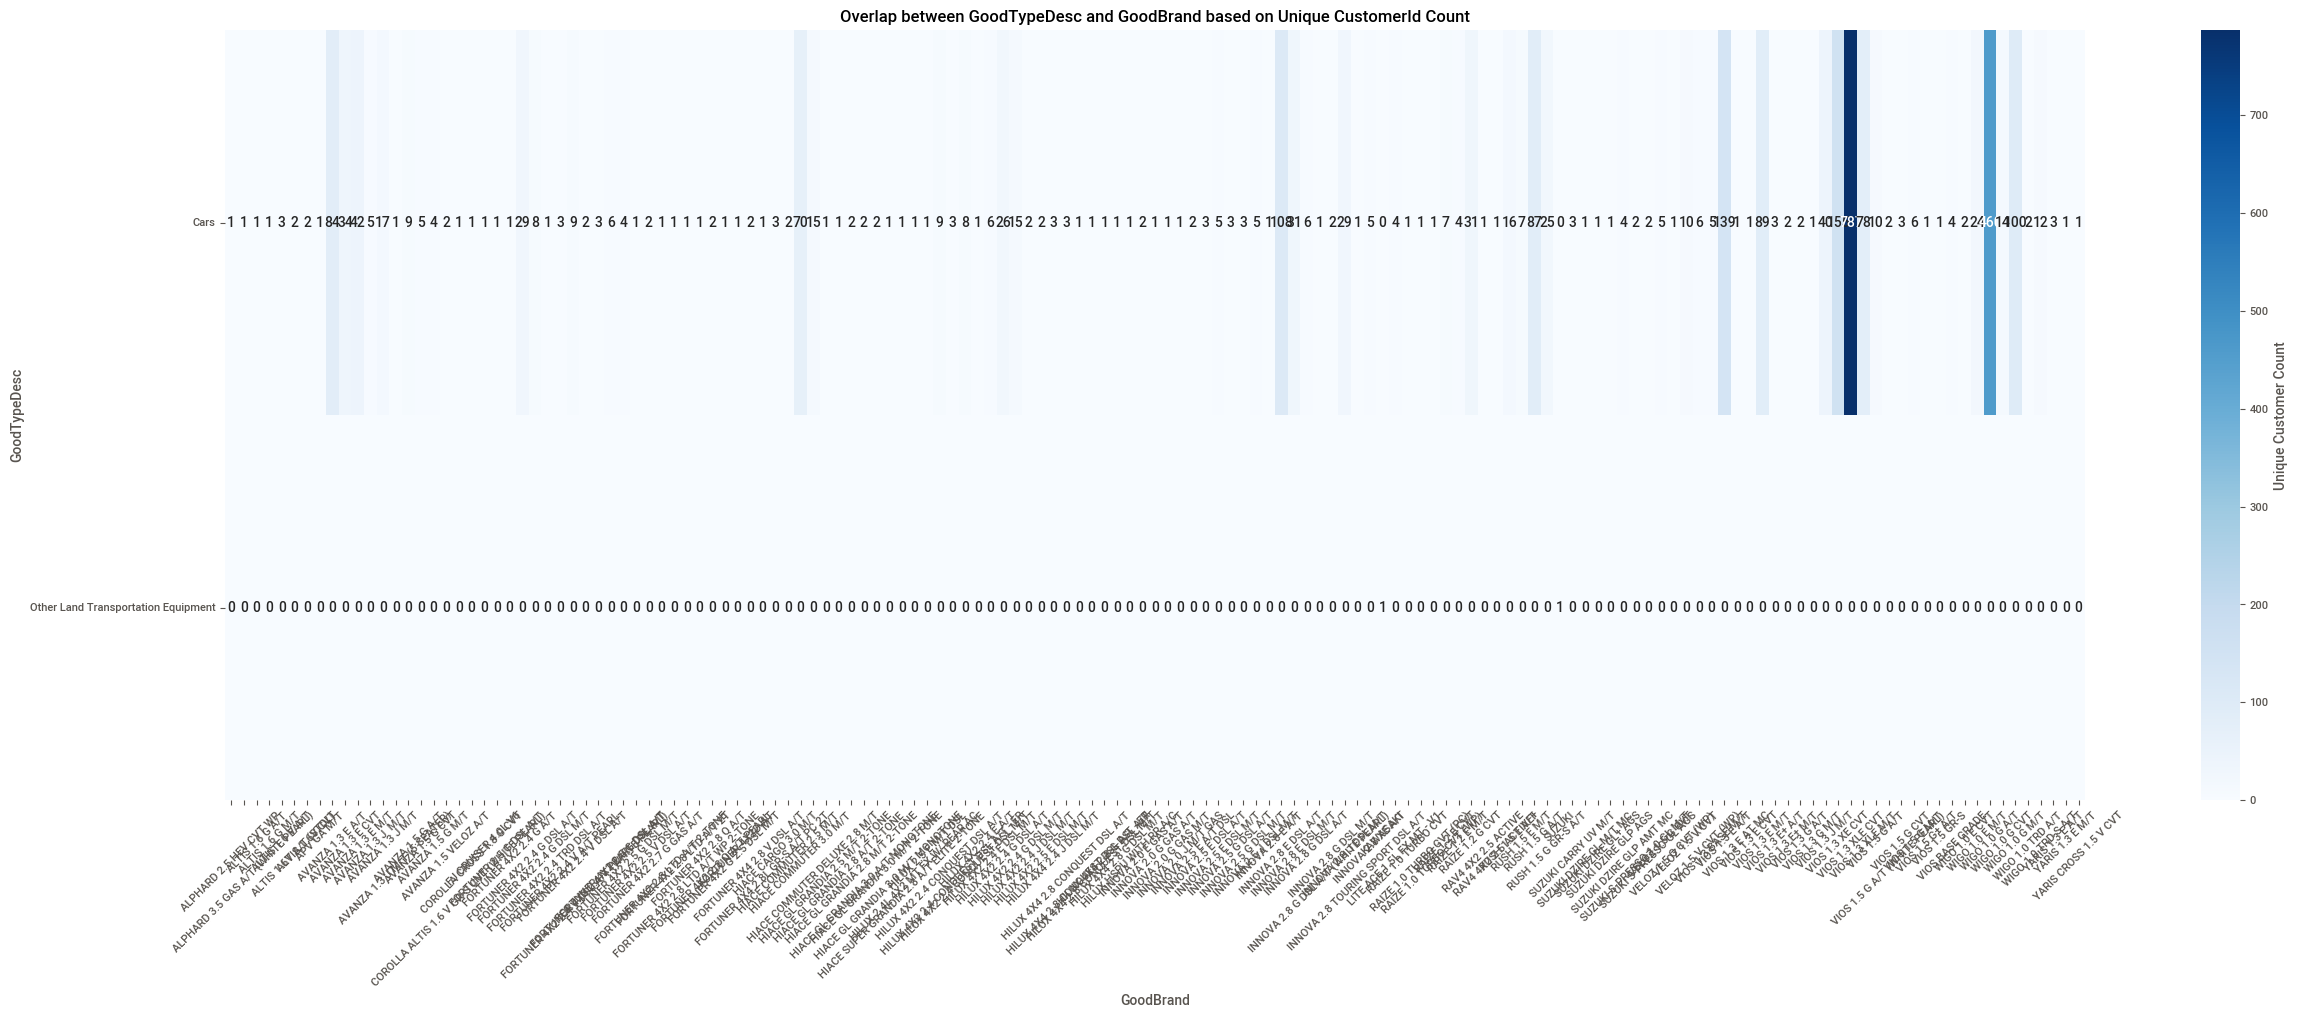

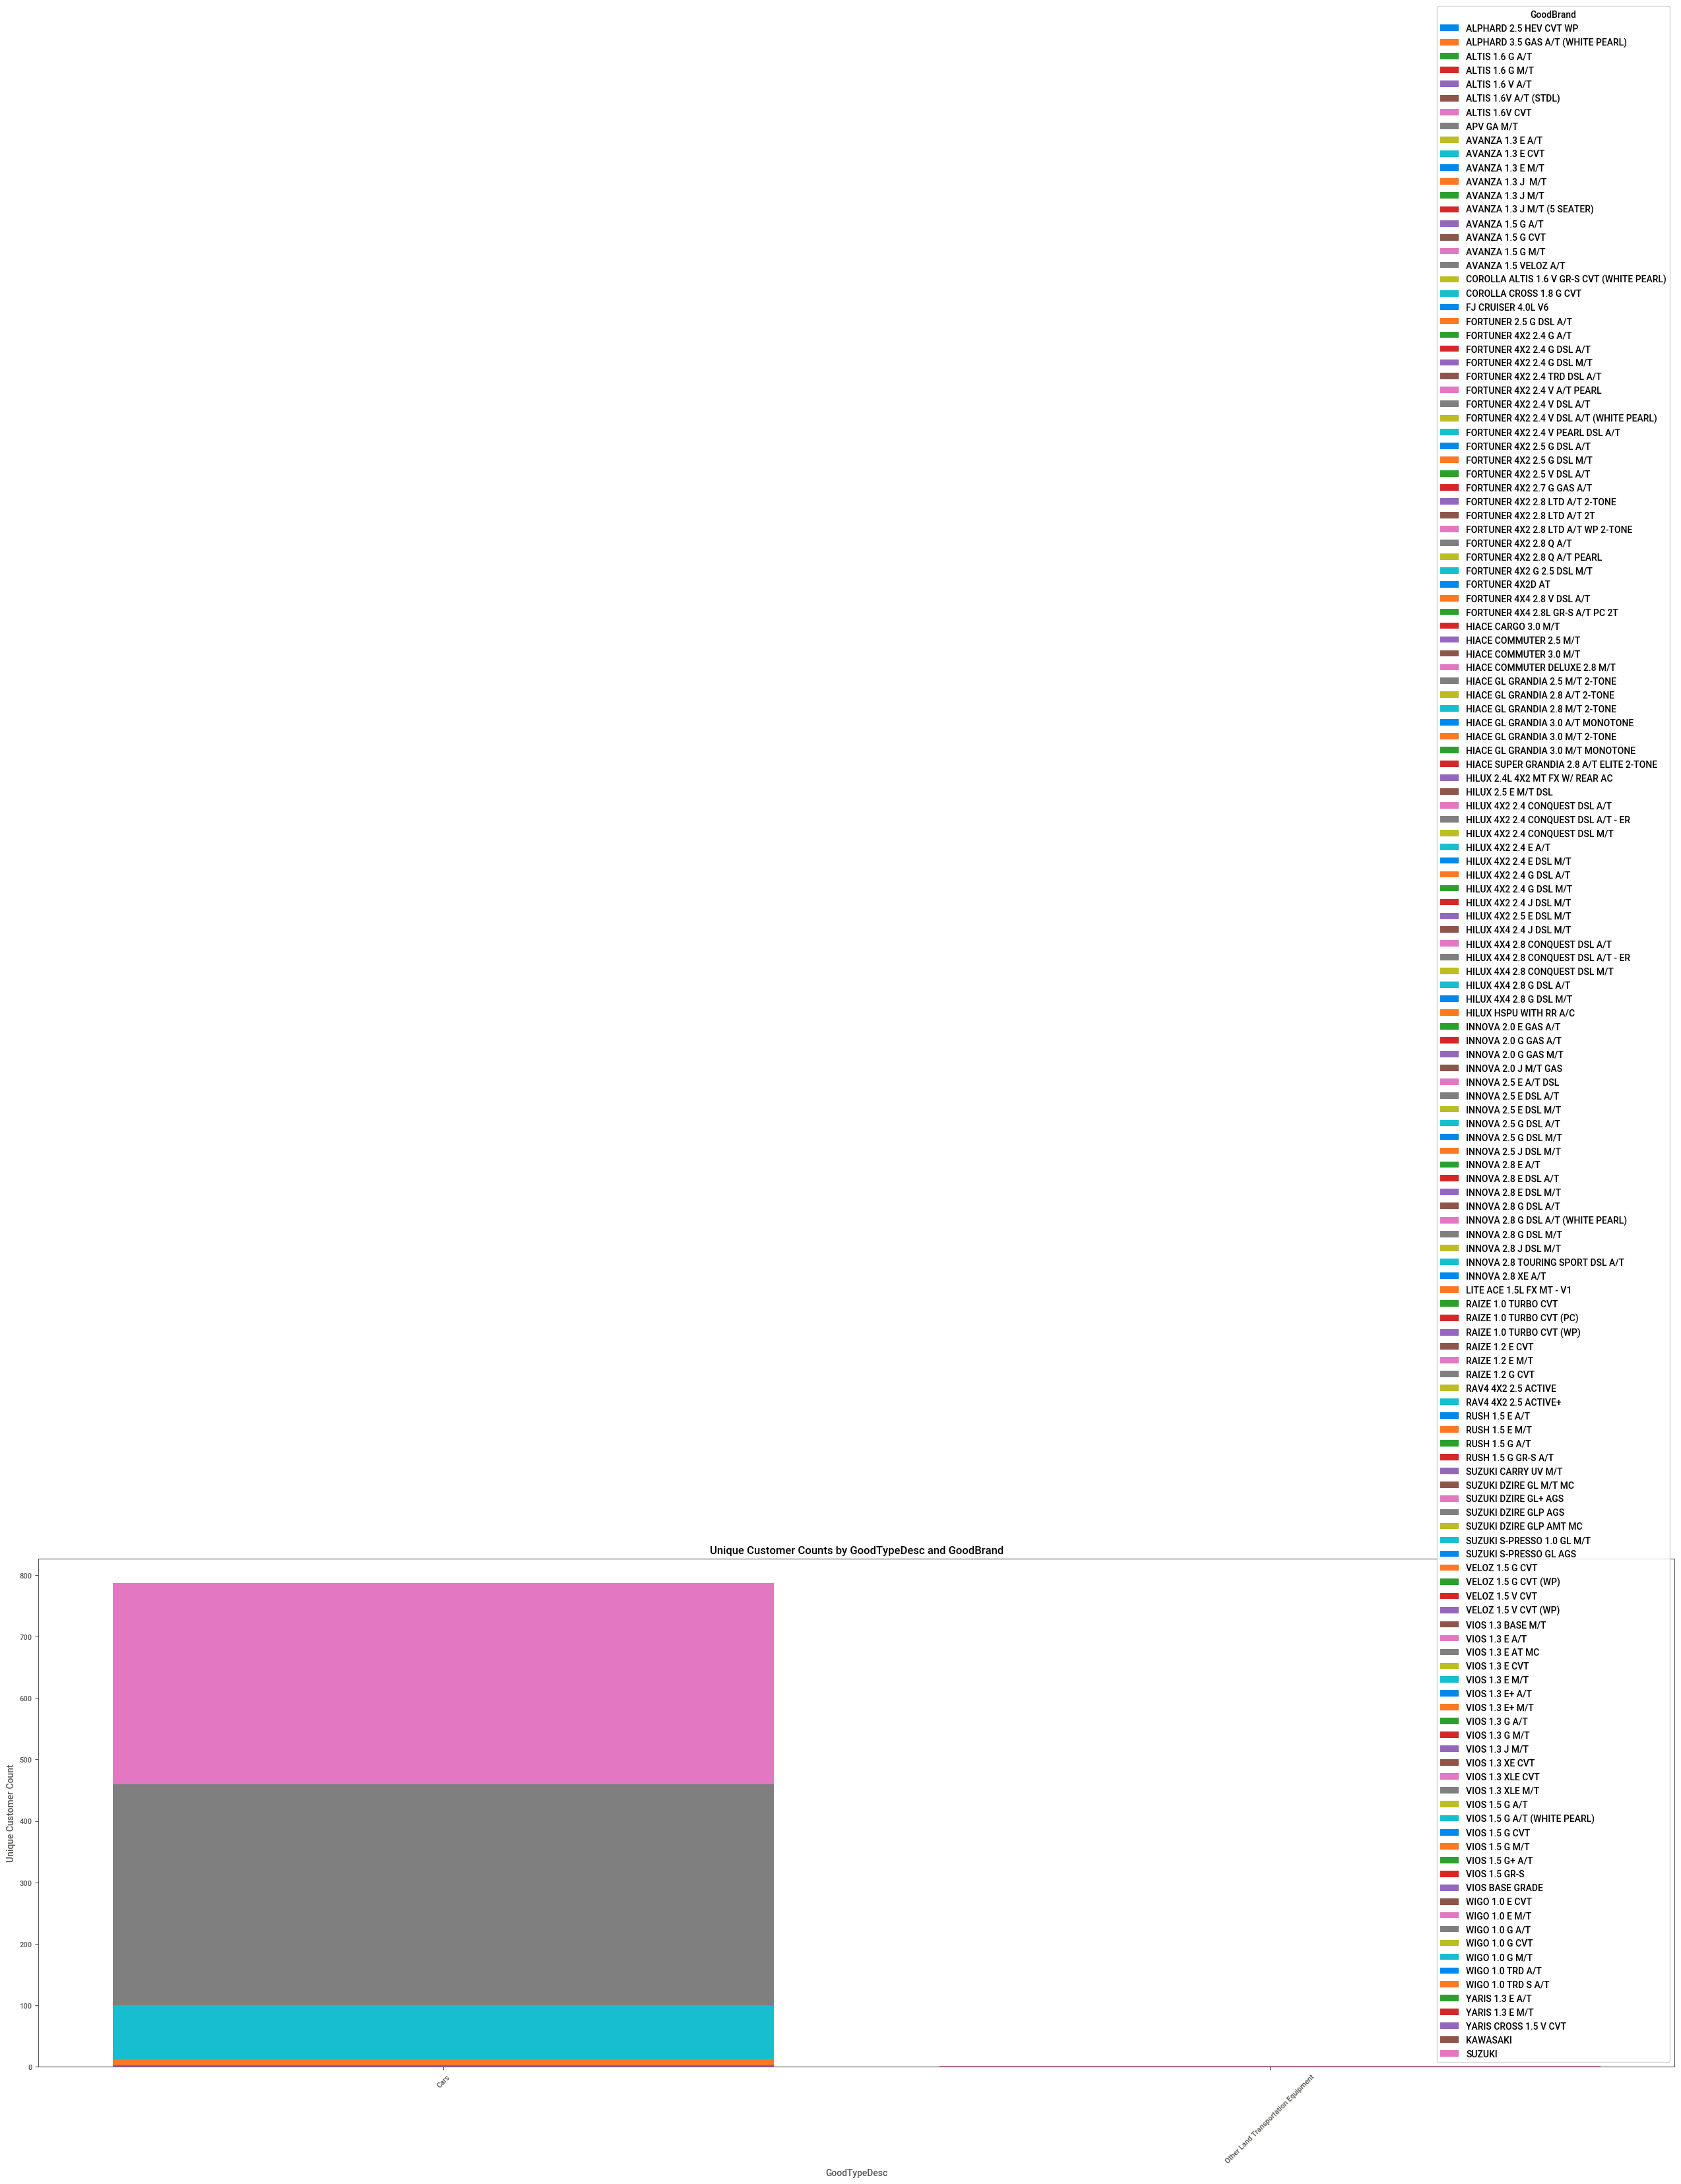

In [27]:
# Group by GoodTypeDesc and GoodBrand and count unique customerId
overlap_data = grantedleasing.groupby(['GoodTypeDesc', 'GoodBrand'])['customerId'].nunique().reset_index()

# Pivot the table for heatmap
overlap_pivot = overlap_data.pivot(index='GoodTypeDesc', columns='GoodBrand', values='customerId').fillna(0)

# Plot heatmap
plt.figure(figsize=(30, 10))
sns.heatmap(overlap_pivot, annot=True, fmt=".0f", cmap='Blues', cbar_kws={'label': 'Unique Customer Count'})
plt.title('Overlap between GoodTypeDesc and GoodBrand based on Unique CustomerId Count')
plt.xlabel('GoodBrand')
plt.ylabel('GoodTypeDesc')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
# plt.tight_layout()
plt.show()

# Plot bar chart
plt.figure(figsize=(32, 10))

# Create a bar chart for each combination
for brand in overlap_data['GoodBrand'].unique():
    subset = overlap_data[overlap_data['GoodBrand'] == brand]
    plt.bar(subset['GoodTypeDesc'], subset['customerId'], label=brand)

plt.title('Unique Customer Counts by GoodTypeDesc and GoodBrand')
plt.xlabel('GoodTypeDesc')
plt.ylabel('Unique Customer Count')
plt.xticks(rotation=45)
plt.legend(title='GoodBrand')
# plt.tight_layout()
plt.show()